In [1]:
%matplotlib inline
import cython
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext cython

## The logistic map

The logistic map is defined as

$$x_{i+1} = \mu\ x_i\ (1-x_i)$$

Iterating over a function is a typical non-vectorizable computation.

Below, I define functions that iterate N times over the map and return
the final value, in plain Python and in Cython.

In [3]:
def iterate_logistic_map(x0, mu, N):
    x = x0
    for i in range(N):
        x = mu*x*(1-x)
    return x

In [4]:
%%cython

def iterate_logistic_map_cy(double x0, double mu, int N):
    cdef double x = x0
    for i in range(N):
        x = mu*x*(1-x)
    return x

### Timings

First, for a single call

In [5]:
%timeit x = iterate_logistic_map_cy(x0=0.1, mu=3.9, N=10**4)

32.7 µs ± 611 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
%timeit x = iterate_logistic_map(x0=0.1, mu=3.9, N=10**4)

889 µs ± 126 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


And timings with repeated calls, which is the "standard" use case for
this type of map.

In [7]:
%%timeit
x_data = []
mu_data = np.linspace(2, 4, 2001)

for mu in mu_data:
    x_data.append(iterate_logistic_map(x0=np.random.random(), mu=mu, N=10**4))
    
x_data = np.array(x_data)

7.77 s ± 439 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit
x_data = []
mu_data = np.linspace(2, 4, 2001)

for mu in mu_data:
    x_data.append(iterate_logistic_map_cy(x0=np.random.random(), mu=mu, N=10**4))
    
x_data = np.array(x_data)

68 ms ± 579 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
# Actually generate the data for plotting

x_data = []
mu_data = np.linspace(2, 4, 16001)

for mu in mu_data:
    x_data.append(iterate_logistic_map_cy(x0=np.random.random(), mu=mu, N=10**4))
    
x_data = np.array(x_data)

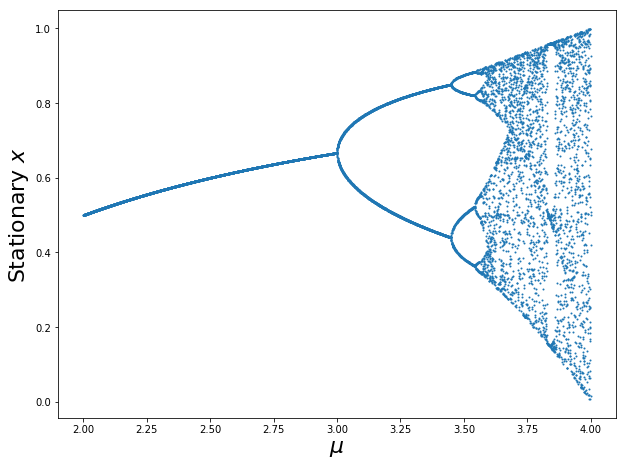

In [10]:

plt.figure(figsize=(10, 7.5))
plt.plot(mu_data, x_data, ls='', marker='o', markersize=1)
plt.xlabel(r'$\mu$', fontsize=22)
plt.ylabel(r'Stationary $x$', fontsize=22)